In [411]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [412]:
peng = pd.read_csv("clean_penguins.xlsx")

In [413]:
peng

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,37.8,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,35.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [414]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


---------------------------------------------------------------------------------------------------------------------

KNN ALGORİTMASI

In [415]:
peng = pd.read_csv("clean_penguins.xlsx")
df = peng.copy()

In [416]:
df["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [417]:
df["sex"].value_counts()

sex
MALE      173
FEMALE    169
Name: count, dtype: int64

In [418]:
#Kategorik değişkenler için one hot dönüşümü gerçekleştirdik
dms = pd.get_dummies(df[['island', 'sex']])
dms.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,False,False,True,False,True
1,False,False,True,True,False
2,False,False,True,True,False
3,False,False,True,True,False
4,False,False,True,False,True


In [419]:
 #dummy tuzağına yakalandığımız için bu durumu ortadan bu şekilde kaldırmamız gerekiyor
dms = pd.get_dummies(df[['island', 'sex']], drop_first=True)
dms = dms.astype(int)
dms.head()

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1


In [420]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,37.8,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,35.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [421]:

a = df['species']
# 'species' sütununu 0, 1 ve 2'ye dönüştürmek için bir haritalama yapalım
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
a = a.map(species_mapping)
y = a
# Sonucu kontrol edelim
print(a)

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64


In [422]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64

In [423]:
X_ = df.drop(["species","sex","island"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık

In [424]:
X_

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.7,181.0,3750.0
1,35.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [425]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.8 KB


In [426]:
X_.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.7,181.0,3750.0
1,35.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [427]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,37.8,18.7,181.0,3750.0,0,1,1
1,35.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [428]:
y

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64

In [429]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [430]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
237,46.2,14.5,209.0,4800.0,0,0,0
116,37.3,20.5,199.0,3775.0,0,1,1
113,39.6,20.7,191.0,3900.0,0,0,0
42,44.1,19.7,196.0,4400.0,1,0,1
126,41.5,18.3,195.0,4300.0,0,1,1
...,...,...,...,...,...,...,...
79,34.6,17.2,189.0,3200.0,0,1,0
193,50.9,19.1,196.0,3550.0,1,0,1
18,46.0,21.5,194.0,4200.0,0,1,1
140,40.6,17.2,187.0,3475.0,1,0,1


In [431]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
31,39.5,17.8,188.0,3300.0,1,0,0
244,46.1,15.1,215.0,5100.0,0,0,1
228,46.8,15.4,215.0,5150.0,0,0,1
175,46.7,17.9,195.0,3300.0,1,0,0
249,47.3,15.3,222.0,5250.0,0,0,1
...,...,...,...,...,...,...,...
188,52.0,20.7,210.0,6700.0,1,0,1
71,39.6,17.2,196.0,3550.0,0,1,0
106,38.2,20.0,190.0,3900.0,0,0,1
270,48.5,14.1,220.0,5300.0,0,0,1


In [432]:
y_test

237    2
116    0
113    0
42     0
126    0
      ..
79     0
193    1
18     0
140    0
265    2
Name: species, Length: 103, dtype: int64

In [433]:
y_train

31     0
244    2
228    2
175    1
249    2
      ..
188    1
71     0
106    0
270    2
102    0
Name: species, Length: 239, dtype: int64

In [434]:
knn = KNeighborsClassifier()  #eğitim 
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [435]:
y_pred = knn_model.predict(X_test)  #test

In [436]:
accuracy_score(y_test, y_pred)   #başarısı

0.7864077669902912

In [437]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.55      0.33      0.41        18
           2       0.89      0.91      0.90        35

    accuracy                           0.79       103
   macro avg       0.73      0.70      0.71       103
weighted avg       0.77      0.79      0.77       103



Model Tuning: Bu süreç, farklı hiperparametre değerlerini deneyerek en iyi sonucu veren parametre setini bulmaya odaklanır.

In [438]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [439]:
knn_params = {"n_neighbors": np.arange(1,50)}  #komşu sayısı değeri

In [440]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train) #cv: çapraz doğrulama sayısı

In [441]:
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi parametreler: {'n_neighbors': 7}


In [442]:
knn = KNeighborsClassifier(7)
knn_tuned = knn.fit(X_train, y_train)   #test

In [443]:
knn_tuned.score(X_test, y_test)#bu şekilde de accuracy metriğine ulaşabiliriz

0.7766990291262136

In [444]:
y_pred = knn_tuned.predict(X_test)

In [445]:
accuracy_score(y_test, y_pred)

0.7766990291262136

In [446]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision_weighted)

Precision (Weighted): 0.764594333730767


In [447]:
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall_weighted)

Recall (Weighted): 0.7766990291262136


In [448]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-score (Weighted):", f1_weighted)

F1-score (Weighted): 0.7622904654129293


In [449]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        50
           1       0.60      0.33      0.43        18
           2       0.89      0.91      0.90        35

    accuracy                           0.78       103
   macro avg       0.74      0.70      0.71       103
weighted avg       0.76      0.78      0.76       103



------------------------------------------------------------------------

ANN ALGORİTMASI

In [450]:
peng = pd.read_csv("clean_penguins.xlsx")
df = peng.copy()
dms = pd.get_dummies(df[['island', 'sex']]) #onehot
dms = pd.get_dummies(df[['island', 'sex']], drop_first=True) #dummy tuzağı
dms = dms.astype(int)
dms.head()

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1


In [451]:

a = df['species']
# 'species' sütununu 0, 1 ve 2'ye dönüştürmek için bir haritalama yapalım
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
a = a.map(species_mapping)
y = a
# Sonucu kontrol edelim
print(a)

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64


In [452]:
X_ = df.drop(["species","sex","island"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık
X_

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.7,181.0,3750.0
1,35.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [453]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,37.8,18.7,181.0,3750.0,0,1,1
1,35.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [454]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [455]:
from sklearn.preprocessing import StandardScaler  

In [456]:
scaler = StandardScaler()

In [457]:
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  #ölçeklendirme işlemi

In [458]:
from sklearn.neural_network import MLPClassifier

In [459]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [460]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9805825242718447

In [461]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



Model Tunning

In [462]:
mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [463]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\demir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defa

In [464]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001], # L2 düzenlileştirme parametresi. Bu, aşırı uyuma (overfitting) karşı bir regülasyon sağlar. Çeşitli alpha değerleri denetlenerek, modelin genelleme yeteneğini artırması beklenir.
              "hidden_layer_sizes": [(10,10,10),  #üç katmanlı bir ağ oluşturur ve her katmanda 10 nöron bulunur.
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)], #Çeşitli yapıların denemesi, en iyi performansı sağlayacak modelin seçilmesine yardımcı olabilir.
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

#solver: ağırlık optimizasyon yöntemi. Büyük veri setlerinde daha çok kabul edilen ağırlık optimizasyon yöntemidir. Bizim elimizdeki veri çok karmaşık ve büyük değilse belki farklı bir ağırlık optimizasyon yöntemi bizim için daha iyidir.
#hidden_layer_sizes (gizli katman) kaç katmandan ve nörondan oluşacak bilgisini verir. Her katman için nöron sayısını girerek kaç katmnadan oluşacağını da bildirmiş oluruz.
#activation fonksiyonu ön tanımlı değeri relu dur biz bir de logistic (sigmoid) fonksiyonunu deneyelim
#alpha; düzenleştirme parametresidir. Ön tanımlı değeri 0.0001 miş

In [465]:
mlpc = MLPClassifier()  #çok katmanlı algılayıcı modeli oluşturulur.
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, #en iyi parametreleri bulmayı amaçlar. 
                         cv = 10, 
                         n_jobs = -1, #Paralel işlemlerin kullanılacağı işlemci sayısı (-1, tüm işlemcileri kullan demek).
                         verbose = 2).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [466]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [470]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.02, 
                           hidden_layer_sizes = (5, 3),
                          solver = "lbfgs")

In [471]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.02, hidden_layer_sizes=(5, 3), solver='lbfgs')

In [472]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6699029126213593

In [473]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision_weighted)

Precision (Weighted): 0.8258964802067992


In [474]:
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall_weighted)

Recall (Weighted): 0.6699029126213593


In [475]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-score (Weighted):", f1_weighted)

F1-score (Weighted): 0.6363334516789131


In [476]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        50
           1       0.95      1.00      0.97        18
           2       0.51      1.00      0.68        35

    accuracy                           0.67       103
   macro avg       0.82      0.77      0.71       103
weighted avg       0.83      0.67      0.64       103



----------------------------------------------------------------------

RANDOM FORESTS ALGORİTMASI

In [553]:
peng = pd.read_csv("clean_penguins.xlsx")
df = peng.copy()
dms = pd.get_dummies(df[['island', 'sex']]) #onehot
dms = pd.get_dummies(df[['island', 'sex']], drop_first=True) #dummy tuzağı
dms = dms.astype(int)
dms.head()

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1


In [554]:

a = df['species']
# 'species' sütununu 0, 1 ve 2'ye dönüştürmek için bir haritalama yapalım
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
a = a.map(species_mapping)
y = a
# Sonucu kontrol edelim
print(a)

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64


In [555]:
X_ = df.drop(["species","sex","island"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık
X_

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.7,181.0,3750.0
1,35.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [556]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,37.8,18.7,181.0,3750.0,0,1,1
1,35.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [557]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [558]:
from sklearn.ensemble import RandomForestClassifier

In [559]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [560]:
rf_model

RandomForestClassifier()

In [561]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9805825242718447

In [562]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



Model Tuning

In [563]:
rf_model

RandomForestClassifier()

In [564]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\demir\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini

In [565]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

#"n_estimators"; kullanılacak ağaç sayısı
#max_features;  bölünmeler için maksimum kaç özellik gerekli bilgisidir
#"max_depth", "min_samples_split" 

In [566]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train) 

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [567]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [568]:
rf_tuned = RandomForestClassifier(max_depth = 8,   #en fazla kaç düğüme kadar dallanabileceğini belirtir.
                                  max_features = 2, #Her bir ağaçta kullanılacak olan maksimum özellik sayısı.
                                  min_samples_split = 5, #Bir düğümü bölmek için gereken minimum örnek sayısı.
                                  n_estimators = 10) #ormanın içindeki ağaç sayısı.

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=2, min_samples_split=5,
                       n_estimators=10)

In [569]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9805825242718447

In [570]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision_weighted)

Precision (Weighted): 0.9825242718446602


In [571]:
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall_weighted)

Recall (Weighted): 0.9805825242718447


In [572]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-score (Weighted):", f1_weighted)

F1-score (Weighted): 0.9808953729677871


In [573]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



In [574]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

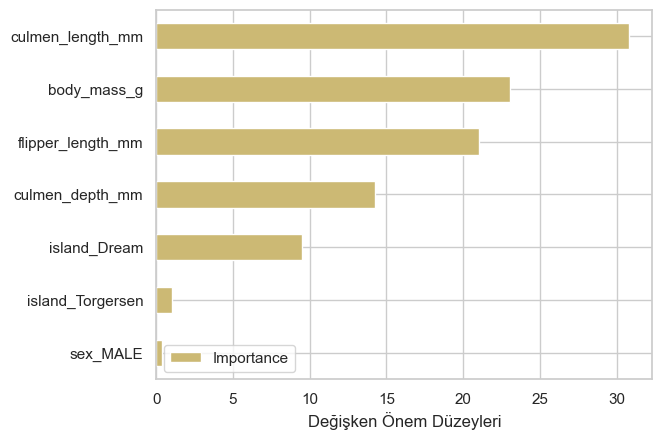

In [575]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "y")

plt.xlabel("Değişken Önem Düzeyleri")

Tür değişkenini en fazla etkileyen değer gaga uzunluğudur.

------------------------------------------------------------------------

XGBOOST ALGORTİMASI

In [500]:
df = peng.copy()
dms = pd.get_dummies(df[['island', 'sex']]) #onehot
dms = pd.get_dummies(df[['island', 'sex']], drop_first=True) #dummy tuzağı
dms = dms.astype(int)
dms.head()

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1


In [501]:

a = df['species']
# 'species' sütununu 0, 1 ve 2'ye dönüştürmek için bir haritalama yapalım
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
a = a.map(species_mapping)
y = a
# Sonucu kontrol edelim
print(a)

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64


In [502]:
X_ = df.drop(["species","sex","island"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık
X_

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.7,181.0,3750.0
1,35.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [503]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,37.8,18.7,181.0,3750.0,0,1,1
1,35.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [504]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [505]:
!pip install xgboost
from xgboost import XGBClassifier

In [506]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [507]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [508]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9805825242718447

In [509]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



Model Tuning

In [510]:
xgb_model.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [511]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> imators=None, n_jobs=None,
           num_parallel_tree=None, objective='multi:softprob', ...)
File:        c:\users\demir\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float

In [512]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

#'subsample'; Eğitim örneğinin alt örnek oranı. 

In [513]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [514]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [515]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [516]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [517]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9805825242718447

In [518]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision_weighted)

Precision (Weighted): 0.9825242718446602


In [519]:
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall_weighted)

Recall (Weighted): 0.9805825242718447


In [520]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-score (Weighted):", f1_weighted)

F1-score (Weighted): 0.9808953729677871


In [521]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.98      0.98      0.98       103



---------------------------------------------------------------------------------

CART

In [522]:
#Kategorik değişkenler için one hot dönüşümü gerçekleştirdik
dms = pd.get_dummies(df[['island', 'sex']])
dms.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,False,False,True,False,True
1,False,False,True,True,False
2,False,False,True,True,False
3,False,False,True,True,False
4,False,False,True,False,True


In [523]:
 #dummy tuzağına yakalandığımız için bu durumu ortadan bu şekilde kaldırmamız gerekiyor
dms = pd.get_dummies(df[['island', 'sex']], drop_first=True)
dms = dms.astype(int)
dms.head()

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1


In [524]:

a = df['species']
# 'species' sütununu 0, 1 ve 2'ye dönüştürmek için bir haritalama yapalım
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
a = a.map(species_mapping)
y = a
# Sonucu kontrol edelim
print(a)

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Name: species, Length: 342, dtype: int64


In [525]:
X_ = df.drop(["species","sex","island"], axis = 1).astype("float64")#burada bağımlı değişken ve kategorik değişkenleri veri setinden çıkardık

In [526]:
X = pd.concat([X_, dms], axis = 1)#sayısal bağımlı değişken ile düzenlediğimiz kategorik değişkenleri birleştirip X'e tüm bağımsız değişkenleri atmış oluyoruz
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,37.8,18.7,181.0,3750.0,0,1,1
1,35.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [527]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [528]:
#veri setini test ve train olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [529]:
from sklearn.tree import DecisionTreeClassifier

In [530]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [531]:
cart_model

DecisionTreeClassifier()

In [532]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9611650485436893

In [533]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.90      1.00      0.95        18
           2       1.00      0.94      0.97        35

    accuracy                           0.96       103
   macro avg       0.95      0.97      0.96       103
weighted avg       0.96      0.96      0.96       103



In [534]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [535]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\demir\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=

In [536]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

#maxdepth: ağacın derinliği bilgisi, ağacın karmaşıklığını dallanmaları kontrol etmek için kullanılan bir parametre
#Ağacın maksimum derinliği. 
#Hiçbiri yoksa, düğümler tüm yapraklar saf olana kadar veya tüm yapraklar min_samples_split'ten daha az örnek içerene kadar genişletilir.
#dallanma dolayısıyla overfitting önüne geçmek için kullanılır

#min_samples_split; Bölünme için gerekli olan minimum örnek sayısı. Bir bölünme gerçekleşti, tekrar bölünme gerçekleşip gerçekleşmeyeceğini belirlemek için kullanılan bir argüman.

In [537]:
cart = DecisionTreeClassifier()
cart_cv_model = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [538]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2}


In [539]:
cart = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3)
cart_tuned = cart.fit(X_train, y_train)

In [540]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9611650485436893

In [541]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision_weighted)

Precision (Weighted): 0.9631067961165048


In [542]:
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall_weighted)

Recall (Weighted): 0.9611650485436893


In [543]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1-score (Weighted):", f1_weighted)

F1-score (Weighted): 0.9613904836334125


In [544]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.90      1.00      0.95        18
           2       1.00      0.94      0.97        35

    accuracy                           0.96       103
   macro avg       0.95      0.97      0.96       103
weighted avg       0.96      0.96      0.96       103



---------------------------------------------------------------------------------------------

MODELLERİN KARŞILAŞTIRILMASI

In [584]:
modeller = [
    knn_tuned, #KNN
    #svc_tuned, #SVM
    mlpc_tuned, #ANN
    #rf_tuned, #RANDOM FORESTS
    xgb_tuned, #XGBOOST
    cart_tuned  #CART
    
]
for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.6%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 77.669903%
----------------------------
MLPClassifier:
Accuracy: 66.990291%
----------------------------
XGBClassifier:
Accuracy: 98.058252%
----------------------------
DecisionTreeClassifier:
Accuracy: 96.116505%


Text(0.5, 1.0, 'Modellerin Doğruluk Oranları')

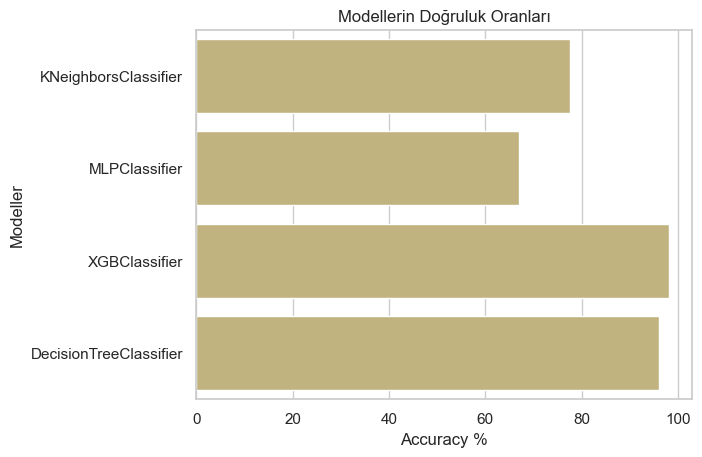

In [585]:
sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    dogruluk = accuracy_score(y_test, y_pred)
    
    # Her iterasyonda yeni bir DataFrame oluşturuyoruz
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns=["Modeller", "Accuracy"])
    
    # Oluşturulan DataFrame'i sonuclar DataFrame'ine ekliyoruz
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)
    
sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color="y")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları')

In [586]:
from sklearn.metrics import precision_score
import pandas as pd

# Model isimleri ve tahminleri için boş bir veri çerçevesi oluşturun
results = pd.DataFrame(columns=['Model', 'Precision'])

# Modelleri ve isimlerini döngü ile gezin
for model in modeller:
    isimler = model.__class__.__name__
    
    # Modelin tahminlerini yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Precision Score'u hesapla
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    
    # Sonuçları veri çerçevesine ekle
    new_row = pd.DataFrame({'Model': [isimler], 'Precision': [precision_weighted]})
    results = pd.concat([results, new_row], ignore_index=True)

# Oluşturulan veri çerçevesini ekrana yazdır
print(results)



                    Model  Precision
0    KNeighborsClassifier   0.764594
1           MLPClassifier   0.825896
2           XGBClassifier   0.982524
3  DecisionTreeClassifier   0.963107


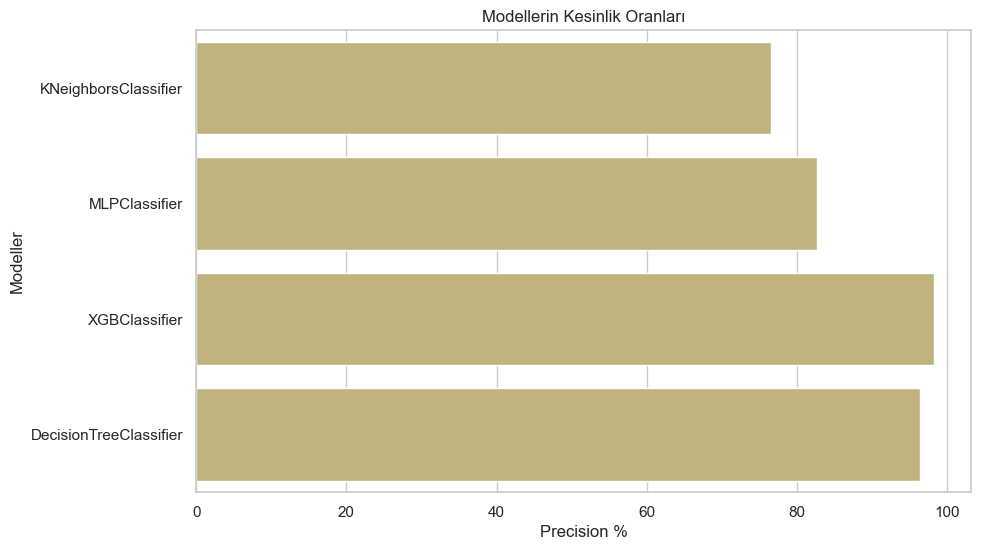

In [587]:
# Boş bir DataFrame oluştur
sonuclar = pd.DataFrame(columns=["Modeller", "Precision"])

for model in modeller:
    isimler = model.__class__.__name__
    
    # Tahminleri yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Precision Score'u hesapla
    kesinlik = precision_score(y_test, y_pred, average='weighted')
    
    # Her iterasyonda yeni bir DataFrame oluşturuyoruz
    sonuc = pd.DataFrame([[isimler, kesinlik * 100]], columns=["Modeller", "Precision"])
    
    # Oluşturulan DataFrame'i sonuclar DataFrame'ine ekliyoruz
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

# Çubuk grafik oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision', y='Modeller', data=sonuclar, color="y")
plt.xlabel('Precision %')
plt.title('Modellerin Kesinlik Oranları')
plt.show()

In [588]:

# Model isimleri ve tahminleri için boş bir veri çerçevesi oluşturun
results = pd.DataFrame(columns=['Model', 'Recall'])

# Modelleri ve isimlerini döngü ile gezin
for model in modeller:
    isimler = model.__class__.__name__
    
    # Modelin tahminlerini yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Precision Score'u hesapla
    precision_weighted = recall_score(y_test, y_pred, average='weighted')
    
    # Sonuçları veri çerçevesine ekle
    new_row = pd.DataFrame({'Model': [isimler], 'Recall': [precision_weighted]})
    results = pd.concat([results, new_row], ignore_index=True)

# Oluşturulan veri çerçevesini ekrana yazdır
print(results)


                    Model    Recall
0    KNeighborsClassifier  0.776699
1           MLPClassifier  0.669903
2           XGBClassifier  0.980583
3  DecisionTreeClassifier  0.961165


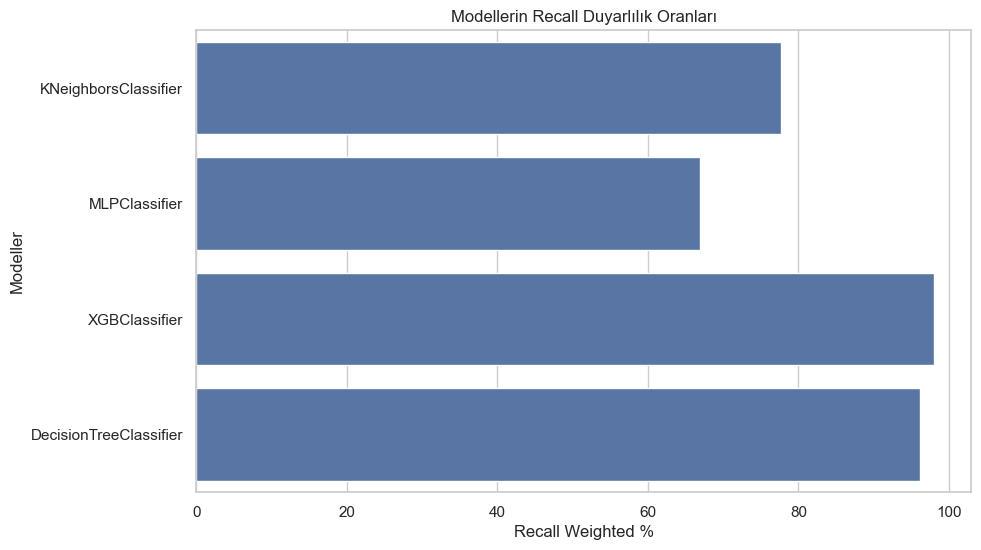

In [589]:
# Boş bir DataFrame oluştur
sonuclar_recall = pd.DataFrame(columns=["Modeller", "Recall_Weighted"])

for model in modeller:
    isimler = model.__class__.__name__
    
    # Tahminleri yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Recall Score'u hesapla
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    
    # Her iterasyonda yeni bir DataFrame oluşturuyoruz
    sonuc_recall = pd.DataFrame([[isimler, recall_weighted * 100]], columns=["Modeller", "Recall_Weighted"])
    
    # Oluşturulan DataFrame'i sonuclar_recall DataFrame'ine ekliyoruz
    sonuclar_recall = pd.concat([sonuclar_recall, sonuc_recall], ignore_index=True)

# Çubuk grafik oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall_Weighted', y='Modeller', data=sonuclar_recall, color="b")
plt.xlabel('Recall Weighted %')
plt.title('Modellerin Recall Duyarlılık Oranları')
plt.show()

In [590]:
# Model isimleri ve tahminleri için boş bir veri çerçevesi oluşturun
results = pd.DataFrame(columns=['Model', 'F1'])

# Modelleri ve isimlerini döngü ile gezin
for model in modeller:
    isimler = model.__class__.__name__
    
    # Modelin tahminlerini yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Precision Score'u hesapla
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Sonuçları veri çerçevesine ekle
    new_row = pd.DataFrame({'Model': [isimler], 'Recall': [f1_weighted]})
    results = pd.concat([results, new_row], ignore_index=True)

# Oluşturulan veri çerçevesini ekrana yazdır
print(results)


                    Model   F1    Recall
0    KNeighborsClassifier  NaN  0.762290
1           MLPClassifier  NaN  0.636333
2           XGBClassifier  NaN  0.980895
3  DecisionTreeClassifier  NaN  0.961390


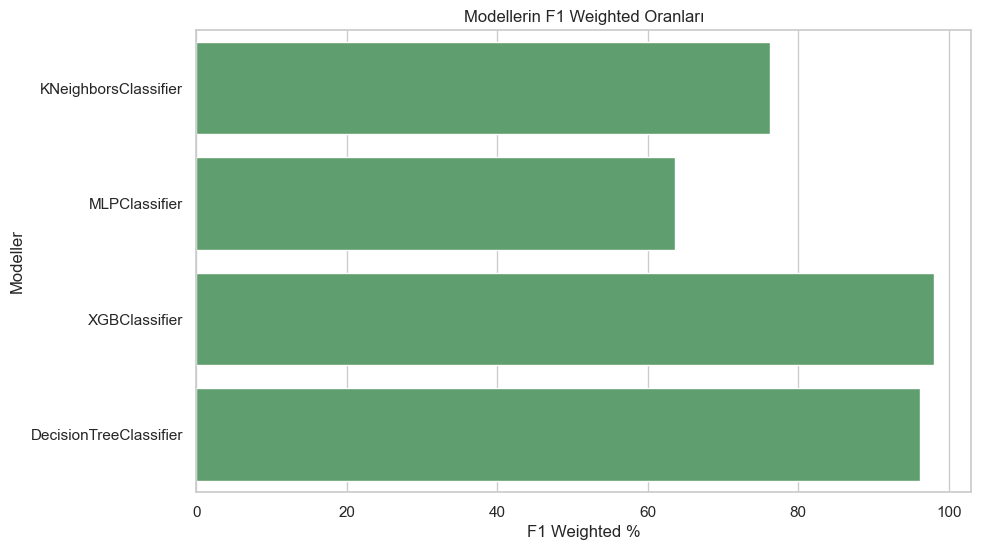

In [591]:
# Boş bir DataFrame oluştur
sonuclar_f1 = pd.DataFrame(columns=["Modeller", "F1_Weighted"])

for model in modeller:
    isimler = model.__class__.__name__
    
    # Tahminleri yap
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # F1 Score'u hesapla
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Her iterasyonda yeni bir DataFrame oluşturuyoruz
    sonuc_f1 = pd.DataFrame([[isimler, f1_weighted * 100]], columns=["Modeller", "F1_Weighted"])
    
    # Oluşturulan DataFrame'i sonuclar_f1 DataFrame'ine ekliyoruz
    sonuclar_f1 = pd.concat([sonuclar_f1, sonuc_f1], ignore_index=True)

# Çubuk grafik oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='F1_Weighted', y='Modeller', data=sonuclar_f1, color="g")
plt.xlabel('F1 Weighted %')
plt.title('Modellerin F1 Weighted Oranları')
plt.show()